In [125]:
from sklearn.datasets import load_digits

# 1797 sets
digits = load_digits()

<Figure size 432x288 with 0 Axes>

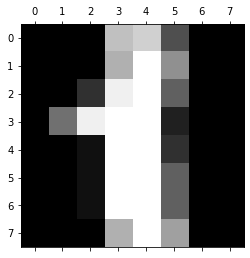

In [126]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5) #automatically stratifiess

In [128]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [129]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train_5)

In [130]:
# measure accuracy by finding the ratio of correct predictions to the number of test instances

# from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = sgd_clf.predict(X_test)
# num_correct = sum(predictions == (y_test == 5))

# print(num_correct/len(y_test))

In [131]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")

# accuracy is good but it is not the preferred performance measure because in a case where a model only guesses an instance is a non-5 and 90% of the training
# set are non-5s, then it would have a 90% accuracy even though it's completely wrong

array([0.95666667, 0.92666667, 0.91638796])

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# confusion matrix is a better way to evaluate the performance of a model

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # predicts an instance using a different fold

confusion = confusion_matrix(y_train_5, y_train_pred)
print(confusion)

[[801   3]
 [ 11  83]]


In [133]:
'''
precision (TP/(TP + FP)) is not a good metric because in a situation where there is only one single positive prediction and that prediction is correct
will result in a perfect precision

That's why precision is a metric that is accompanied by recall (TP/(TP+FN)) which is the ratio of positive instances that are correctly deteced by the
classifier
'''

"\nprecision (TP/(TP + FP)) is not a good metric because in a situation where there is only one single positive prediction and that prediction is correct\nwill result in a perfect precision\n\nThat's why precision is a metric that is accompanied by recall (TP/(TP+FN)) which is the ratio of positive instances that are correctly deteced by the\nclassifier\n"

In [134]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred))
# precision represents how many times the model predicted a 5
# recall represents how many 5s it detected

0.9651162790697675 0.8829787234042553


In [135]:
# A more convenient way to evaluate the performance of the model is to combine precision and recall into the F1 score (harmonic mean). 
# gives more weight to lower values of precision and recall, which means they have to be high in order to have a high F1 score

from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.9222222222222223

In [136]:
sgd_clf.fit(X_train, y_train_5)
y_scores = sgd_clf.decision_function(X_test)

threshold = 850
y_some_digit_pred = (y_scores > threshold)
print(sum((y_some_digit_pred == (y_test == 5)) == False))
print(len(y_some_digit_pred))

18
899


In [137]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [138]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

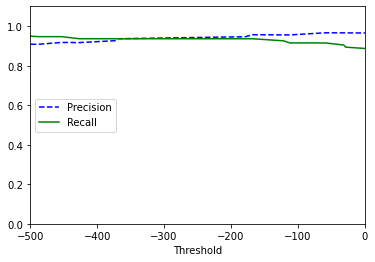

In [139]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1.1])
    plt.xlim([-500, 0])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [140]:
y_train_pred_90 = (y_scores > -300) #get the training instances that would be classified as positive and give 90% precision. I'm deciding the decision boundary
print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))

0.946236559139785 0.9361702127659575


In [141]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [142]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9909495077802477

In [143]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba") #returns Nx2 matrix. col=class, row=instance

In [144]:
# use the prob of pos class as the score for the ROC score
y_scores_forest = y_probas_forest[:, 1] # get the 2nd col because that is the prob of the positive class (instance is a 5)

In [145]:
from sklearn.metrics import roc_curve

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

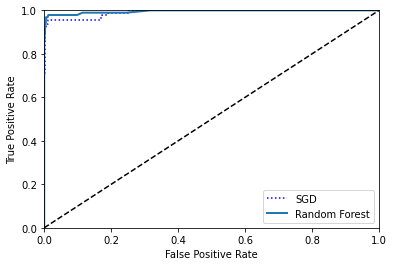

In [146]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [147]:
roc_auc_score(y_train_5, y_scores_forest)

0.9954482904625807

In [148]:
print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))

0.946236559139785 0.9361702127659575


In [149]:
#MULTICLASS CLASSIFICATION

In [150]:
# Feature scaling. scale the features so that the machien learning algo performs better. SGD converges faster when the vals are scaled

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.95666667, 0.92307692, 0.93311037])

In [151]:
'''
if a model is promising, one way to improve it is to see its errors
'''

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mtx = confusion_matrix(y_train, y_train_pred)
print(conf_mtx)

[[84  0  0  0  0  0  0  0  0  0]
 [ 0 83  1  1  0  0  0  0  2  2]
 [ 0  1 80  2  0  0  0  0  2  0]
 [ 0  0  0 89  0  1  0  1  4  2]
 [ 1  1  0  0 75  0  2  1  3  0]
 [ 0  0  0  0  0 90  0  0  2  2]
 [ 0  1  0  0  1  0 91  0  1  0]
 [ 0  0  0  1  1  0  0 95  2  0]
 [ 0  3  0  0  1  1  0  0 75  1]
 [ 0  1  0  5  1  2  0  1  2 80]]


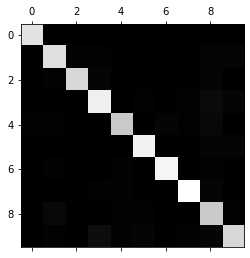

In [152]:
plt.matshow(conf_mtx, cmap=plt.cm.gray)

In [153]:
#2s seem to be performing the worst which means either two things: too few 2 training instances or the model does not perform as well on 2s

In [154]:
#verify the cause:

row_sums = conf_mtx.sum(axis=1, keepdims=True) #axis=1 means row, keepsdims=True means keep dimension
norm_conf_mtx = conf_mtx / row_sums

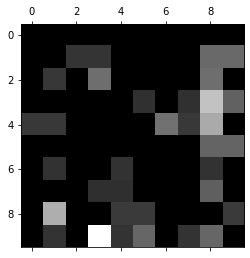

In [155]:
np.fill_diagonal(norm_conf_mtx, 0) # fill diagonal with zeros to single out the errors
plt.matshow(norm_conf_mtx, cmap=plt.cm.gray)
plt.show()

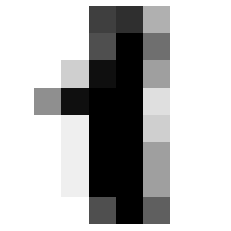

In [156]:
import matplotlib

def plot_digit(data):
    image = data.reshape(8, 8)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(digits.images[1])

In [157]:
def plot_digits(instances, images_per_row=5):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

89


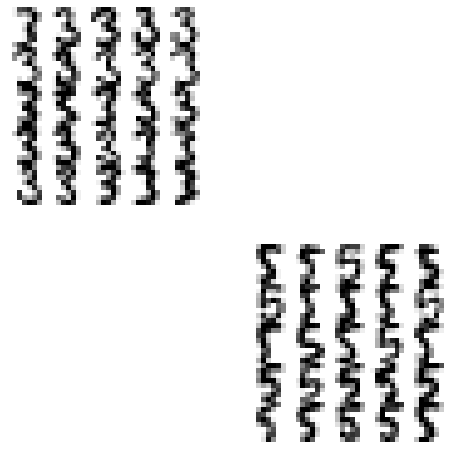

In [161]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # get images where they're both threes in labels and predictions
# X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # get images where the actual label is 3 but predicted as 5
# X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
print(len(X_aa))
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
# plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
# plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

#doesn't work because there aren't that many errors as in the book. The dataset is different

In [162]:
#MULTILABEL CLASSIFICATION

In [180]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

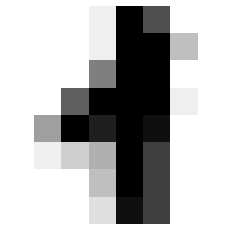

In [181]:
plot_digit(X_train[2])

In [182]:
knn_clf.predict([X_train[2]])

array([[False,  True]])

In [185]:
#performance measure for multilabel classification
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted") # average="weighted" so that the weights of the label equals its frequency

0.9724190456409597

In [237]:
noise = np.random.randint(0, 5, (len(X_train), 64)) # make np array of rand ints in range [0, 100] with dims len(X_train) * 64
X_train_mod = X_train + noise
noise = np.random.randint(0, 5, (len(X_test), 64))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

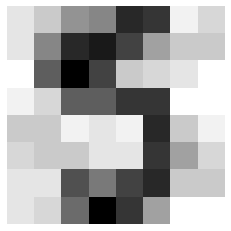

In [238]:
plot_digit(np.array([X_test_mod[3]]))

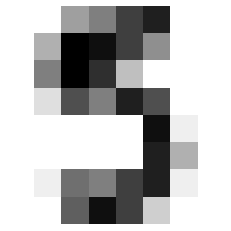

In [239]:
plot_digit(np.array([y_test_mod[3]]))

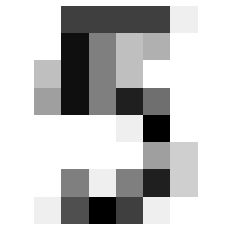

In [240]:
knn_clf.fit(X_train_mod, y_train_mod)
plot_digit(knn_clf.predict([X_test_mod[3]]))